<a href="https://colab.research.google.com/github/SMKProj/SentimentAnalysis/blob/main/YTAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project performs sentiment analysis on description of vidoes posted on Sweden Youtube official channel. https://youtube.com/@sweden

Firstly data is acquired using request API method in json format which is then filtered to required fields and saved as a dataframe. The dataframe constitue videoId,title, description, viewCount, LikeCount, CommentCount columns.

Initially a generic world cloud is generated using description column of dataframe. Later ploarity of texts given in description field is computed using TextBlob package. Polarity assigns a range of values between -1.0 to 1.0, where -1.0 represents most negative and 1.0 refers to most positive text. The word clouds for most positive, less positive and less negative polarities are generated. Words with most negative polarity was not found in given description text.

Later bar plot for 5 most liked and 5 least liked videos are plotted using plotly.

In [1]:
import requests
import pandas as pd
import time
import matplotlib.pyplot as plt


In [2]:
APIKey = '*******************************'
CHID = 'UCDxRH_wOCO1LDcQlK3F8_HA'

In [44]:
url = 'https://www.googleapis.com/youtube/v3/search?part=id,snippet&maxResults=50&order=ViewCount&type=video&key='+APIKey+'&channelId='+CHID
response = requests.get(url).json()

In [4]:
cid = []
for r in range(0,len(response['items'])):
  cid.append(response['items'][r]['id']['videoId'])

In [5]:
cdict={}
for c in range(0,len(cid)):
  cdict[c] = cid[c]



In [6]:
vdo_stats = {}
index=0
for i in cid:
  url2 = 'https://youtube.googleapis.com/youtube/v3/videos?part=statistics&id='+i+'&key='+APIKey
  response2 = requests.get(url2).json()
  vdo_stats[index] = response2
  index=index+1

In [8]:
vdo_stats[0]['items'][0]

{'kind': 'youtube#video',
 'etag': 'dzgSSIJgR3G4pE1FGEXQuyZtyZE',
 'id': 'u8ZLpGOOA1Q',
 'statistics': {'viewCount': '2324736',
  'likeCount': '14954',
  'favoriteCount': '0',
  'commentCount': '2062'}}

In [9]:
vid = []
title = []
description = []
viewCount = []
likeCount = []
commentCount = []
for i in range(0,len(vdo_stats)):
  vid.append(vdo_stats[i]['items'][0]['id'])
  title.append(response['items'][i]['snippet']['title'])
  description.append(response['items'][i]['snippet']['description'])
  viewCount.append(int(vdo_stats[i]['items'][0]['statistics']['viewCount']))
  likeCount.append(int(vdo_stats[i]['items'][0]['statistics']['likeCount']))
  commentCount.append(int(vdo_stats[i]['items'][0]['statistics']['commentCount']))


In [11]:
df = pd.DataFrame(list(zip(vid,title,description,viewCount,likeCount,commentCount)),
                  columns=['Vid','Title','Description','ViewCount','LikeCount','CommentCount'])
df.head()

,Vid,Title,Description,ViewCount,LikeCount,CommentCount
0,u8ZLpGOOA1Q,Swedish Midsummer for Dummies,Swedish Midsummer – a holiday devoted to eatin...,2324736,14954,2062
1,vfQU6pI51ww,This is Sweden,This is Sweden showcases facets of life in Swe...,1224284,9047,1383
2,IgxZS4mWSrw,Swedish Lucia for Dummies,Lucia Day (St. Lucy's Day) – a feast of candle...,833427,4098,308
3,WKvqJ05AsPY,This is Kiruna: How to Move a City,"Moving Kiruna, the world's 2nd largest municip...",390511,2277,223
4,BBepPaDeTnQ,How to Become Swedish,Every year on National Day new Swedes are invi...,353288,1493,436


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [13]:
txt = ' '.join(df.Description)

(-0.5, 399.5, 199.5, -0.5)

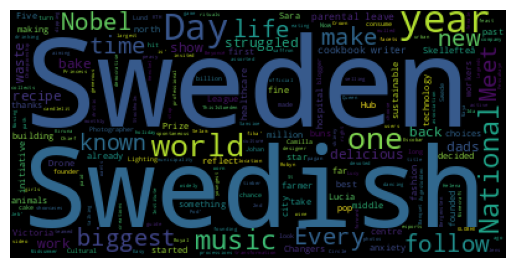

In [15]:
wc = WordCloud(stopwords=set(STOPWORDS)).generate(txt)
plt.imshow(wc)
plt.axis('off')

Examining the polarity of text used in description of videos. -1.0 stands for most negative and 1.0 represents most positive

In [16]:
from textblob import TextBlob
import numpy as np

In [17]:
polarity = []
for comments in df['Description']:
  p = np.round(TextBlob(comments).sentiment.polarity,2)
  polarity.append(p)

In [19]:
df['Polarity'] = polarity
df.head(3)

,Vid,Title,Description,ViewCount,LikeCount,CommentCount,Polarity
0,u8ZLpGOOA1Q,Swedish Midsummer for Dummies,Swedish Midsummer – a holiday devoted to eatin...,2324736,14954,2062,0.0
1,vfQU6pI51ww,This is Sweden,This is Sweden showcases facets of life in Swe...,1224284,9047,1383,0.6
2,IgxZS4mWSrw,Swedish Lucia for Dummies,Lucia Day (St. Lucy's Day) – a feast of candle...,833427,4098,308,0.0


In [20]:
pd.unique(df['Polarity'])

array([ 0.  ,  0.6 ,  0.14,  0.07,  0.04, -0.27, -0.1 ,  0.05,  0.35,
        0.25,  0.17,  0.12,  0.03,  0.58,  0.75,  0.11,  0.2 ,  0.18,
        0.06,  0.34, -0.05,  1.  ])

In [21]:
mostpc = df['Polarity'] == 1.0
lesspc = (df['Polarity']>=0.0) & (df['Polarity'] < 1.0)
mostnc = df['Polarity'] == -1.0
lessnc = (df['Polarity']>-1.0) & (df['Polarity'] < 0.0)

In [22]:
most_positive = df[mostpc]
less_positive = df[lesspc]
most_negative = df[mostnc]
less_negative = df[lessnc]

In [23]:
most_pos_com = ' '.join(most_positive['Description'])
less_pos_com = ' '.join(less_positive['Description'])
most_neg_com = ' '.join(most_negative['Description'])
less_neg_com = ' '.join(less_negative['Description'])

In [25]:
most_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_pos_com)
less_pos_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_pos_com)
try:
  most_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(most_neg_com)
except:
  print('Nothing found in most negative polarity range')
less_neg_wc = WordCloud(stopwords=set(STOPWORDS)).generate(less_neg_com)

Nothing found in most negative polarity range


(-0.5, 399.5, 199.5, -0.5)

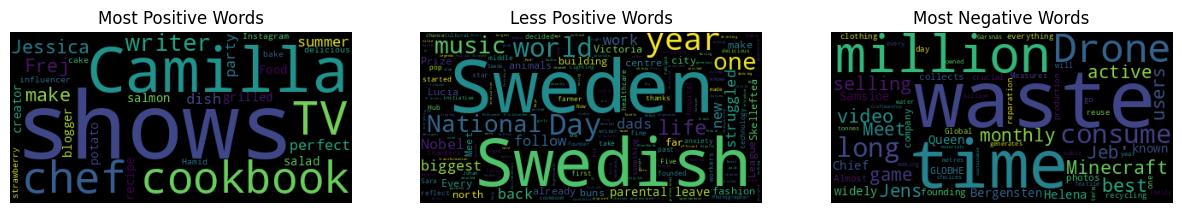

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(1,3,1)
plt.title('Most Positive Words')
plt.imshow(most_pos_wc)
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Less Positive Words')
plt.imshow(less_pos_wc)
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Most Negative Words')
plt.imshow(less_neg_wc)
plt.axis('off')

In [31]:
newdf = df.sort_values(by=['LikeCount'], ascending=False)

In [32]:
newdf.head(3)

,Vid,Title,Description,ViewCount,LikeCount,CommentCount,Polarity
0,u8ZLpGOOA1Q,Swedish Midsummer for Dummies,Swedish Midsummer – a holiday devoted to eatin...,2324736,14954,2062,0.0
1,vfQU6pI51ww,This is Sweden,This is Sweden showcases facets of life in Swe...,1224284,9047,1383,0.6
2,IgxZS4mWSrw,Swedish Lucia for Dummies,Lucia Day (St. Lucy's Day) – a feast of candle...,833427,4098,308,0.0


In [40]:
fiveMostLikedvdosTitle = newdf['Title'].head(5)
fiveMostLikedvdosLikeCount = newdf['LikeCount'].head(5)

**Plotting 5 Most Liked Vidoes**

In [41]:
import plotly.graph_objs as go
from plotly.offline import iplot

trace = go.Bar(x = fiveMostLikedvdosTitle,y= fiveMostLikedvdosLikeCount)
iplot([trace])

**5 Least Liked Vidoes**

In [47]:
fiveLeastLikedvdosTitle = newdf['Title'].tail(5)
fiveLeastLikedvdosLikeCount = newdf['LikeCount'].tail(5)

trace2 = go.Bar(x = fiveLeastLikedvdosTitle,y= fiveLeastLikedvdosLikeCount)
iplot([trace2])